Shortest Remaining Time Scheduling Algorithm (PREEMPTIVE)

Shortest Remainig Time Algorithm (PREEMPTIVE)

1. Process Order: P1,P2,P4,P1,P3
2. Completion Order: 0,1,5,10,17,26


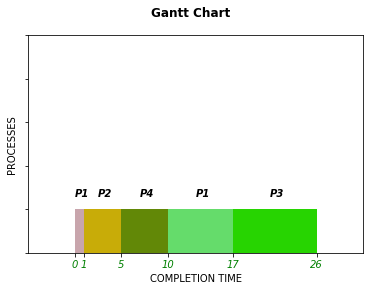

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import random
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# FCFS scheduling Non Preemptive
def drawGantt(processorder,totalcompletion,startime):
    # Declaring a figure "gnt", # Setting Y-axis limits, X-axis limits, # Setting labels for x-axis and y-axis
    fig, gnt = plt.subplots()
    ax = plt.gca()
    
    plt.ylabel("Processes")
    plt.xlabel("X Label")
    
    gnt.set_xlim(-5, totalcompletion[-1]+5)
    gnt.set_ylim(0, 5)
    
    gnt.set_xlabel('COMPLETION TIME')
    gnt.set_ylabel('PROCESSES')
    
    ax.axes.yaxis.set_ticklabels([])
    ax.set_xticks(totalcompletion)
    ax.set_xticklabels(labels = totalcompletion, fontstyle='italic', color='green')
    
    # Setting graph attribute
    #gnt.grid(True)
    
    
    no_of_colors=len(processorder)
    colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])for j in range(no_of_colors)]
    
    processorder1 = []
    for i in processorder:
        processorder1.append("P"+str(i))
            
    # Declaring a bar in schedule
    i = 0
    while i < len(startime):
        ax.text((totalcompletion[i]+(totalcompletion[i+1]-totalcompletion[i])/2)-0.5, 1.3, processorder1[i], style='italic',weight='bold')
        gnt.broken_barh([(totalcompletion[i], totalcompletion[i+1]-totalcompletion[i])], (0, 1), facecolors =(colors[i]))
        i += 1
    print( color.BOLD + color.UNDERLINE+"Shortest Remainig Time Algorithm (PREEMPTIVE)\n"+color.END)
    print("1. Process Order: "+ str(",".join(str(item) for item in processorder1)))
    print("2. Completion Order: "+ str(",".join(str(item) for item in totalcompletion)))
    fig.suptitle('Gantt Chart\n', fontweight ="bold")

    return(plt.savefig("srtgantt.png"))


def SRTN(df): # df is the data frame with arrival / burst time of processes

    queue = []
    cpu, cur_pdf = None, None
    alloc, dalloc = {}, {}
    time = 0
    processorder = []
    completion = []
    starttime = []
    totalcompletion = []
    

    while True: # simulate the CPU scheduling algorithm

        # check if all processes finished execution
        if df['RemainingTime'].max() == 0:
            break

        # get current process assigned to cpu, if any
        if cpu:
            cur_pdf =  df[df.Process == cpu]    

        # check if a process arrived at this time instance and put it into wait queue
        pdf = df[df.ArrivalTime == time]

        if len(pdf) > 0:
            for p in pdf['Process'].values:
                queue.append(p)

        if len(queue) > 0:
            pdf = df[df['Process'].isin(queue)]

            # find the process with shortest remaining time
            if len(pdf) > 0:
                pdf = pdf[pdf['RemainingTime']==pdf['RemainingTime'].min()]

            # allocate a process to CPU, pre-empt the running one if required
            if (cpu is None) or (len(pdf) > 0 and pdf['RemainingTime'].values[0] < cur_pdf['RemainingTime'].values[0]):
                if cpu:
                    # prempt the current process
                    dalloc[cpu] = dalloc.get(cpu, []) + [time]
                    queue.append(cpu)
                    #print('Process {} deallocated from CPU at time {}'.format(cpu, time))
                cur_pdf = pdf
                cpu = cur_pdf['Process'].values[0]
                queue.remove(cpu)
                #print('Process {} allocated to CPU at time {}'.format(cpu, time))
                starttime.append(time)
                processorder.append(cpu)
                alloc[cpu] = alloc.get(cpu, []) + [time]

        df.loc[df['Process']==cpu,'RemainingTime'] -= 1

        time += 1 # increment timer

        # deallocate process
        if df[df['Process']==cpu]['RemainingTime'].values[0] == 0:
            #print('Process {} deallocated from CPU at time {}'.format(cpu, time))
            completion.append(time)
            dalloc[cpu] = dalloc.get(cpu, []) + [time]
            cpu = cur_pdf = None
    totalcompletion = starttime.copy()
    totalcompletion.append(completion[-1])
            
    return alloc, dalloc, totalcompletion, starttime, processorder

# Start
if __name__ =="__main__":
    
    #read file line by line to get input of algorithm
    filedata = []
    filepath = 'srtp.txt'
    with open(filepath) as fp:
        line = fp.readline()
        cnt = 1
        while line:
            filedata_lines = line.strip().split(":")
            filedata.append(filedata_lines[1].split(","))
            line = fp.readline()
            cnt += 1
processes = [int(s) for s in filedata[0]]
bursttime = [int(s) for s in filedata[1]]
arrivaltime = [int(s) for s in filedata[2]]
            
df = pd.DataFrame({'Process':processes, 'BurstTime':bursttime, 'ArrivalTime':arrivaltime})
df.sort_values('ArrivalTime', inplace=True)
df['RemainingTime'] = df.BurstTime
df
            
alloc, dalloc, totalcompletion, startime, processorder = SRTN(df)
#ganttchart
srt_gantt  = drawGantt(processorder,totalcompletion,startime)